# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

##1--> Descripción General Data Frame

En esta competencia, su tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le da un conjunto de registros personales recuperados del sistema informático dañado de la nave.

##**Descripcion de archivo de Entrenamiento y Test**

El archivo ***train.csv*** esta compuesto por los registros personales de aproximadamente dos tercios alrededor de 8700 pasajeros, que se utilizarán como datos de entrenamiento.


El archivo ***test.csv*** son los registros personales para el tercio restante alrededor de 4300 pasajeros, que se utilizarán como datos de prueba.

##*Su tarea es predecir el valor de para los pasajeros en este conjunto. Transported*

##**Descripciones de campos**

**PassengerId** - Un ID único para cada pasajero. Cada ID toma la forma donde indica un grupo con el que viaja el pasajero y es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.gggg_ppggggpp

**HomePlanet** - El lugar del que partió el pasajero, típicamente su lugar de residencia permanente.

**CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

**Cabin** - El número de cabina donde se aloja el pasajero. Toma la forma deck/num/side, donde side puede ser ya sea P para babor o S para estribor.

**Destination** - El planeta al que el pasajero desembarcará.

**Age** - La edad del pasajero.

**VIP **- Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

**RoomService**, **FoodCourt**, **ShoppingMall,** **Spa**, **VRDeck** - Registran el monto que el pasajero a gastado en cada una de estas comodidades a las que tiene acceso, de acuerdo al villete que compro para la nave espacial Titanic.

**Name** - El nombre y apellidos del pasajero.

##**Variable Objetivo**

**Transported** - Si el pasajero fue transportado por error a otra dimensión. 0 No fue transportado, 1 Transportado. Este es el objetivo, la columna que estás tratando de predecir.

##**Descripcion de archivo Predicciones**
El resultado de las predicciones para cada pasajero, Verdadero o Falso; se cargan en el archivo ***sample_submission.csv*** que se envia a la competencia y tiene el siguiente formato

**PassengerId** - Id para cada pasajero en el conjunto de prueba.

**Transported** - El objetivo. Para cada pasajero, prediga True o False

## 2--> Analisis y Visualizacion de Datos

#### **EDA**

In [ ]:
# LIBRERIAS GENERALES Y DE VISUALIZACION
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import missingno as msno
import io 

# LIBRERIAS PARA IMPUTAR DATOS
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer, OneHotEncoder
# import miceforest as mf
from sklearn.feature_extraction import DictVectorizer


# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# LIBRERIAS PARA SEPARACION Y ANALISIS
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report,  mean_squared_error, r2_score, plot_confusion_matrix

# LIBRERIAS PARA PREDICCION DE DATOS
from sklearn import linear_model, neural_network, ensemble
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBRFRegressor, XGBClassifier, XGBRFClassifier


import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()



Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df_test =  pd.read_csv(io.BytesIO(uploaded['test.csv'])) 
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) 
print(df)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
0        3699_04     Europa     False   C/123/P  TRAPPIST-1e  57.0  False   
1        0699_01       Mars      True   F/126/S          NaN  18.0  False   
2        9006_01     Europa      True   B/343/S  TRAPPIST-1e  33.0    NaN   
3        6821_01      Earth     False  F/1420/P  TRAPPIST-1e  43.0  False   
4        0092_01      Earth     False     G/9/P  TRAPPIST-1e  19.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
7818     6894_03       Mars     False  F/1319/S  TRAPPIST-1e  12.0    NaN   
7819     2887_01      Earth     False   G/459/S  TRAPPIST-1e  44.0  False   
7820     8636_01       Mars      True  F/1772/P  TRAPPIST-1e  55.0  False   
7821     4097_01      Earth     False   E/253/P  TRAPPIST-1e  15.0  False   
7822     8144_01     Europa      True   B/270/P  55 Cancri e  45.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Nam

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3699_04,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,False
1,0699_01,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,True
2,9006_01,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,True
3,6821_01,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,False
4,0092_01,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6894_03,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,True
7819,2887_01,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,False
7820,8636_01,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,True
7821,4097_01,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,False


In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0453_02,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,9244_01,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4807_01,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8811_01,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,3184_01,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,6346_02,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5843_01,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,7134_01,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1515_01,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [ ]:
df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
0        3699_04     Europa     False   C/123/P  TRAPPIST-1e  57.0  False   
1        0699_01       Mars      True   F/126/S          NaN  18.0  False   
2        9006_01     Europa      True   B/343/S  TRAPPIST-1e  33.0    NaN   
3        6821_01      Earth     False  F/1420/P  TRAPPIST-1e  43.0  False   
4        0092_01      Earth     False     G/9/P  TRAPPIST-1e  19.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
7818     6894_03       Mars     False  F/1319/S  TRAPPIST-1e  12.0    NaN   
7819     2887_01      Earth     False   G/459/S  TRAPPIST-1e  44.0  False   
7820     8636_01       Mars      True  F/1772/P  TRAPPIST-1e  55.0  False   
7821     4097_01      Earth     False   E/253/P  TRAPPIST-1e  15.0  False   
7822     8144_01     Europa      True   B/270/P  55 Cancri e  45.0  False   

      RoomService  FoodCourt  ShoppingMall 

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000
mean,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744
std,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.nunique()

PassengerId     7823
HomePlanet         3
CryoSleep          2
Cabin           6009
Destination        3
Age               80
VIP                2
RoomService     1195
FoodCourt       1400
ShoppingMall    1045
Spa             1238
VRDeck          1229
Name            7623
Transported        2
dtype: int64

In [ ]:
# Columns with missing values
na_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

,Number_missing,Percentage_missing
HomePlanet,179,2.29
CryoSleep,196,2.51
Cabin,184,2.35
Destination,160,2.05
Age,162,2.07
VIP,184,2.35
RoomService,154,1.97
FoodCourt,155,1.98
ShoppingMall,188,2.40
Spa,158,2.02


In [ ]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
df.Transported.value_counts()

True     3964
False    3859
Name: Transported, dtype: int64

Text(0.5, 0, 'Age (years)')

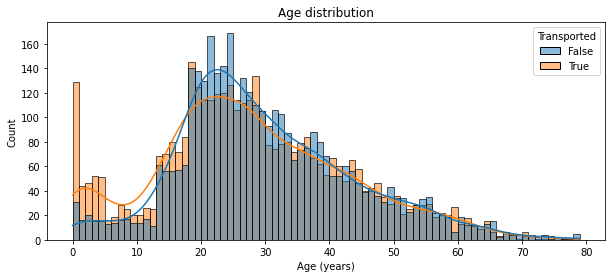

In [ ]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

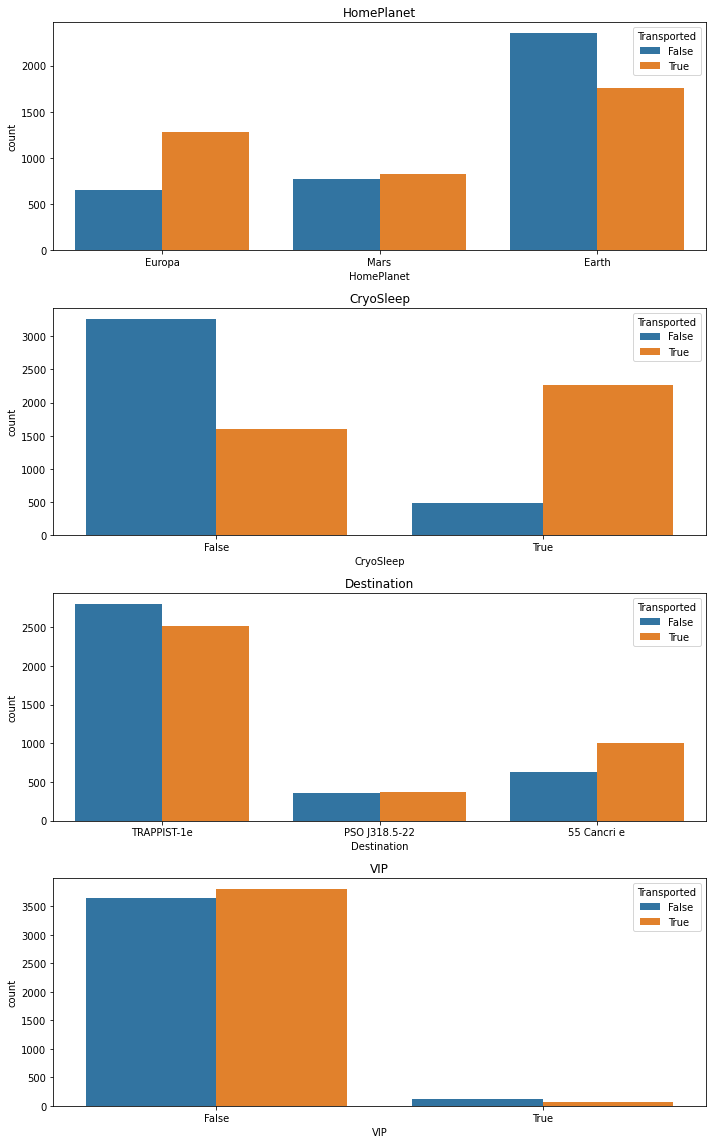

In [ ]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()


In [ ]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient()\
                     .bar(subset=["max"],)\
                     .bar(subset=["mean",])

,count,mean,std,min,25%,50%,75%,max
FoodCourt,7668.000000,455.643062,1621.290107,0.000000,0.000000,0.000000,69.000000,29813.000000
Spa,7665.000000,305.023222,1133.423579,0.000000,0.000000,0.000000,58.000000,22408.000000
VRDeck,7654.000000,295.476744,1093.485752,0.000000,0.000000,0.000000,46.000000,24133.000000
RoomService,7669.000000,226.078237,679.180148,0.000000,0.000000,0.000000,44.000000,14327.000000
ShoppingMall,7635.000000,172.600393,597.923749,0.000000,0.000000,0.000000,28.000000,23492.000000
Age,7661.000000,28.879389,14.461548,0.000000,19.000000,27.000000,38.000000,79.000000


In [ ]:
# sns.set(rc={'figure.figsize':(24,20)})
# for i, column in enumerate(list(df.columns), 1):
#     plt.subplot(8,11,i)
#     p=sns.histplot(x=column,data=df.sample(1000),stat='count',kde=True)

In [ ]:
fig = px.imshow(df.corr())
fig.show()

In [ ]:
print(f'Duplicates in train set: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')
print('')
print(f'Duplicates in test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


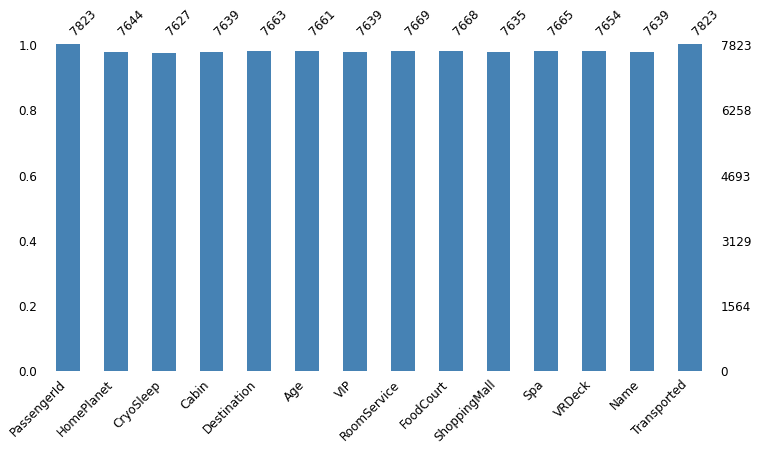

In [ ]:
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

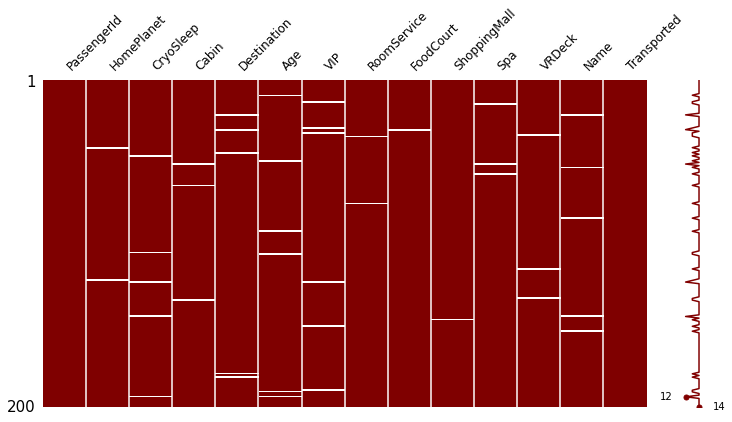

In [ ]:
# Vista de una muestra de 200 registros
msno.matrix(df.sample(200),figsize=(12, 6), fontsize=12, color=[0.5,0,0])

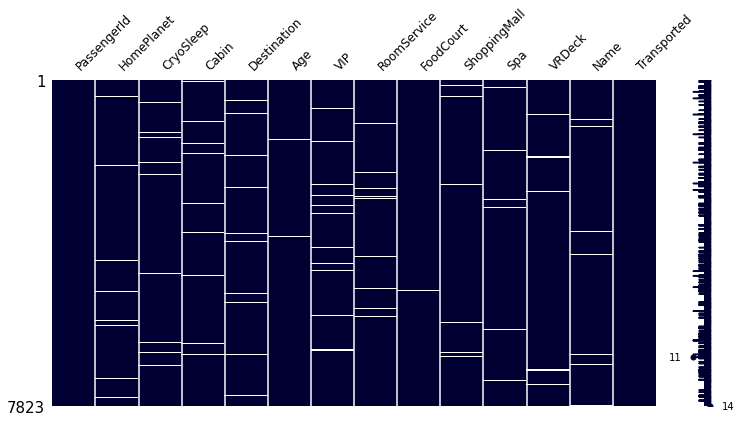

In [ ]:
# Vista del total del data frame
msno.matrix(df, figsize=(12, 6), fontsize=12, color=[0,0,0.2])

### Analisis Variables Categoricas

In [ ]:
# Verifico cuale son las variables OBJECT, veos los valores unicos calculo la cantidad
# El objeto var son como hacemos referencia a cada variable del dataset que tenemos 
for var in df:
    if df[var].dtype == 'object':
        unique_cases = df[var].unique()
        print(var)
        print(unique_cases)
        print(len(unique_cases))

PassengerId
['3699_04' '0699_01' '9006_01' ... '8636_01' '4097_01' '8144_01']
7823
HomePlanet
['Europa' 'Mars' 'Earth' nan]
4
CryoSleep
[False True nan]
3
Cabin
['C/123/P' 'F/126/S' 'B/343/S' ... 'G/459/S' 'F/1772/P' 'E/253/P']
6010
Destination
['TRAPPIST-1e' nan 'PSO J318.5-22' '55 Cancri e']
4
VIP
[False nan True]
3
Name
['Azhah Tronsive' 'Roswal Sha' 'Shaiam Tinganking' ... 'Panzel Ruity'
 'Belly Weavesend' 'Graston Donotaked']
7624


#### HomePlanet

En este caso la Variable nos muestra que particularmente los pasajeros que mas se salvaron tienen origen en la Tierra. Pero no es una variable concluyente para deretminar su trasnportacion.

Transported         0         1
HomePlanet                     
Earth        0.571706  0.428294
Europa       0.337468  0.662532
Mars         0.481505  0.518495
All          0.493590  0.506410


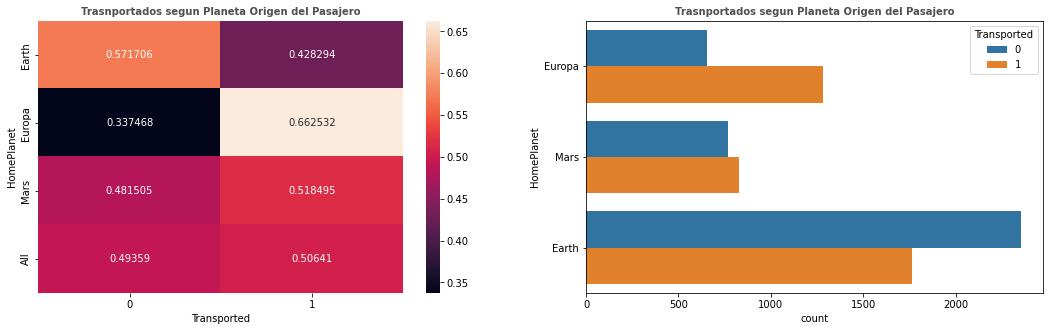

In [ ]:
# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_HomePlanet = pd.crosstab(index = df['HomePlanet'], columns=df['Transported'], margins=True, normalize='index')
print(df_HomePlanet)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun Planeta Origen del Pasajero', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_HomePlanet, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun Planeta Origen del Pasajero', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.HomePlanet, hue=df.Transported)

#### CryoSleep

En este caso los porcentajes demuestra que los pasajeros que tenian contratada la CryoSleep se salvaron 82%.

Transported         0         1
CryoSleep                      
False        0.670704  0.329296
True         0.178882  0.821118
All          0.492985  0.507015


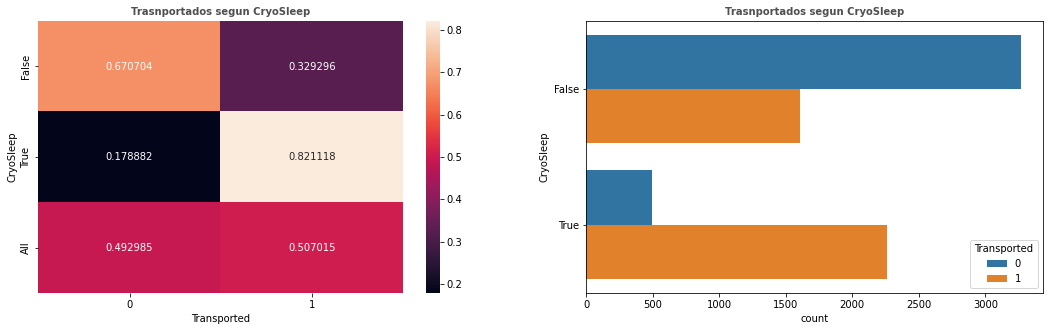

In [ ]:
# Armo una tabla para analizar la variable categorica en este caso calculo la tabla en % una funcion lambda
#df_CryoSleep = pd.crosstab(index = df['CryoSleep'], columns=df['Transported'], margins=True,).apply(lambda r: r/len(df) *100, axis=1)

# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_CryoSleep = pd.crosstab(index = df['CryoSleep'], columns=df['Transported'], margins=True, normalize='index')
print(df_CryoSleep)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun CryoSleep', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_CryoSleep, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun CryoSleep', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.CryoSleep, hue=df.Transported)

#### Destination

Transported           0         1
Destination                      
55 Cancri e    0.382154  0.617846
PSO J318.5-22  0.491690  0.508310
TRAPPIST-1e    0.527276  0.472724
All            0.493149  0.506851


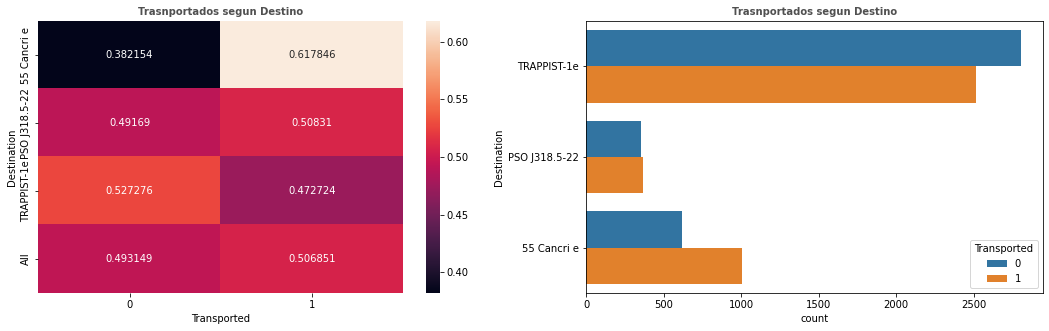

In [ ]:
# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_Destination = pd.crosstab(index = df['Destination'], columns=df['Transported'], margins=True, normalize='index')
print(df_Destination)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun Destino', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_Destination, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun Destino', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.Destination, hue=df.Transported)

#### VIP

Transported         0         1
VIP                            
False        0.489941  0.510059
True         0.633880  0.366120
All          0.493389  0.506611


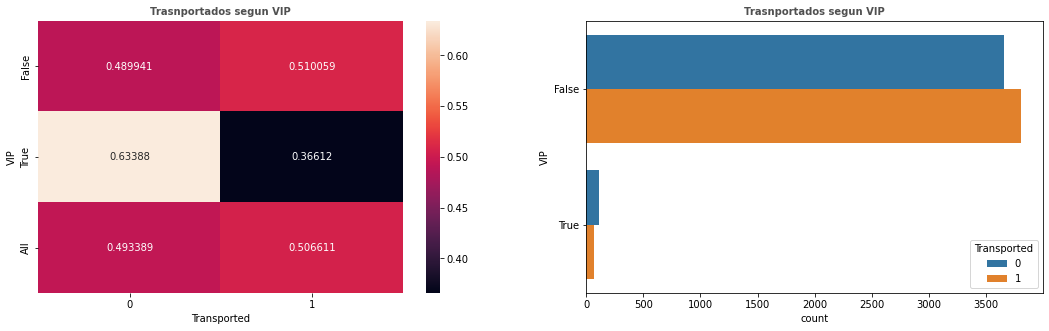

In [ ]:
# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_VIP = pd.crosstab(index = df['VIP'], columns=df['Transported'], margins=True, normalize='index')
print(df_VIP)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun VIP', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_VIP, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun VIP', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.VIP, hue=df.Transported)

#### Cabin

In [ ]:
# Separo la variable Cabin para hacer un analisis de comportamiento

# Transformo la variable Cabin en una lista de str para poder aplicar la funcion split
# Esto transforma los NaN en string por eso no identifica valores nulos en Cabin
df['Cabin'] = df['Cabin'].map(lambda x: str(x))

# Aplico la funcion split y tomo el primero bloque de la lista para asignar al DECK
df['Deck'] = df['Cabin'].apply(lambda x: x.split("/")[0] if x != 'nan' else np.nan)

# Aplico la funcion split y tomo el segundo bloque de la lista para asignar al NUMERO
df['Numero'] = df['Cabin'].apply(lambda x: x.split("/")[1] if x != 'nan' else np.nan)
# Convierto los Numero de Cabina en numerico
df['Numero'] = pd.to_numeric(df['Numero'], downcast='integer')

# Aplico la funcion split y tomo el tercer bloque de la lista para asignar al LADO
df['Lado'] = df['Cabin'].apply(lambda x: x.split("/")[2] if x != 'nan' else np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   object 
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7823 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   bool   
 14  Deck          7639 non-null   object 
 15  Numero        7639 non-null   float64
 16  Lado          7639 non-null   object 
dtypes: bool(1), float64(7), object(9)
memory usage: 985.6+ KB


In [ ]:
# NO EJECUTAR solamente pare verificar la utilizacion de la funcio split#
#cabinas_separada = df["Cabin"].str.split('/', expand=True)
#cabinas_separada.columns = ['Deck', 'Numero', 'Lado']

#df = pd.concat([df, cabinas_separada], axis=1)



##### Deck

Transported         0         1
Deck                           
A            0.485232  0.514768
B            0.266476  0.733524
C            0.314706  0.685294
D            0.565517  0.434483
E            0.638889  0.361111
F            0.556222  0.443778
G            0.483435  0.516565
T            0.750000  0.250000
All          0.493389  0.506611


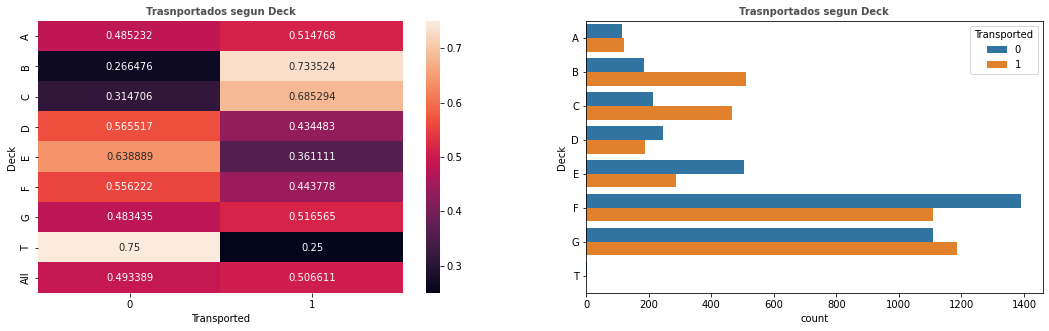

In [ ]:
# ordeno el data frame por Deck
df = df.sort_values('Deck')

# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_Deck = pd.crosstab(index = df['Deck'], columns=df['Transported'], margins=True, normalize='index')
print(df_Deck)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun Deck', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_Deck, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun Deck', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.Deck, hue=df.Transported)

##### Lado

Transported         0         1
Lado                           
P            0.546053  0.453947
S            0.441261  0.558739
All          0.493389  0.506611


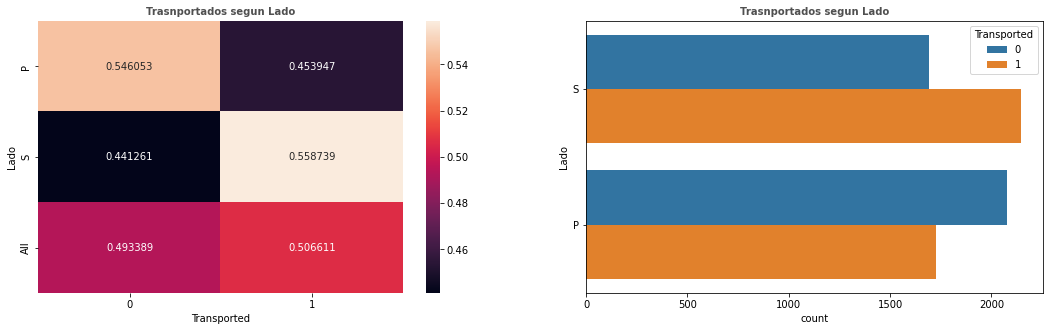

In [ ]:
# Armo una tabla para analizar la variable categorica en este caso calculo la table en % usando normalize='index'
df_Lado = pd.crosstab(index = df['Lado'], columns=df['Transported'], margins=True, normalize='index')
print(df_Lado)

# Defino parametros generales de las graficas
fig = plt.figure(figsize=(18,5))
fig.tight_layout()

graf1 = plt.subplot(1,2,1)
graf1 = plt.title('Trasnportados segun Lado', size=10, fontweight='bold', color='#505050')
graf1 = sns.heatmap(df_Lado, annot=True, fmt='g')

graf2 = plt.subplot(1,2,2)
graf2 = plt.title('Trasnportados segun Lado', size=10, fontweight='bold', color='#505050')
graf2 = sns.countplot(data=df, y=df.Lado, hue=df.Transported)

### Analisis Variables Numericas

In [ ]:
# Determino todas la variables nuemricas
for var in df:
    if df[var].dtype != 'object':
        unique_cases = df[var].unique()
        print(var)
        print(unique_cases)
        print(len(unique_cases))

Age
[57. 18. 33. 43. 19. 23. 29. 36. 38. 31. 17. 27. 20. 21. 39. nan 46. 49.
 55. 22. 52.  0. 56. 51. 41. 25. 34. 26. 64. 63. 37. 48. 53. 14. 16. 50.
 45.  4. 11. 24. 13.  3. 28. 47. 54. 73. 15.  5. 32.  6. 40. 44. 65. 67.
  1. 30. 60. 59.  2.  7. 42. 71. 35. 79. 62. 61.  9. 58. 10. 68.  8. 66.
 12. 74. 70. 72. 69. 75. 78. 77. 76.]
81
RoomService
[  0. 142.  90. ... 215. 271. 797.]
1196
FoodCourt
[3859.    0. 1208. ... 3315. 2347.  840.]
1401
ShoppingMall
[  13.    0.  670. ... 2341. 2251.  807.]
1046
Spa
[1.950e+02 0.000e+00 1.000e+00 ... 1.277e+03 6.190e+02 1.412e+03]
1239
VRDeck
[3874.    0.  204. ... 2153.  408.  304.]
1230
Transported
[False  True]
2


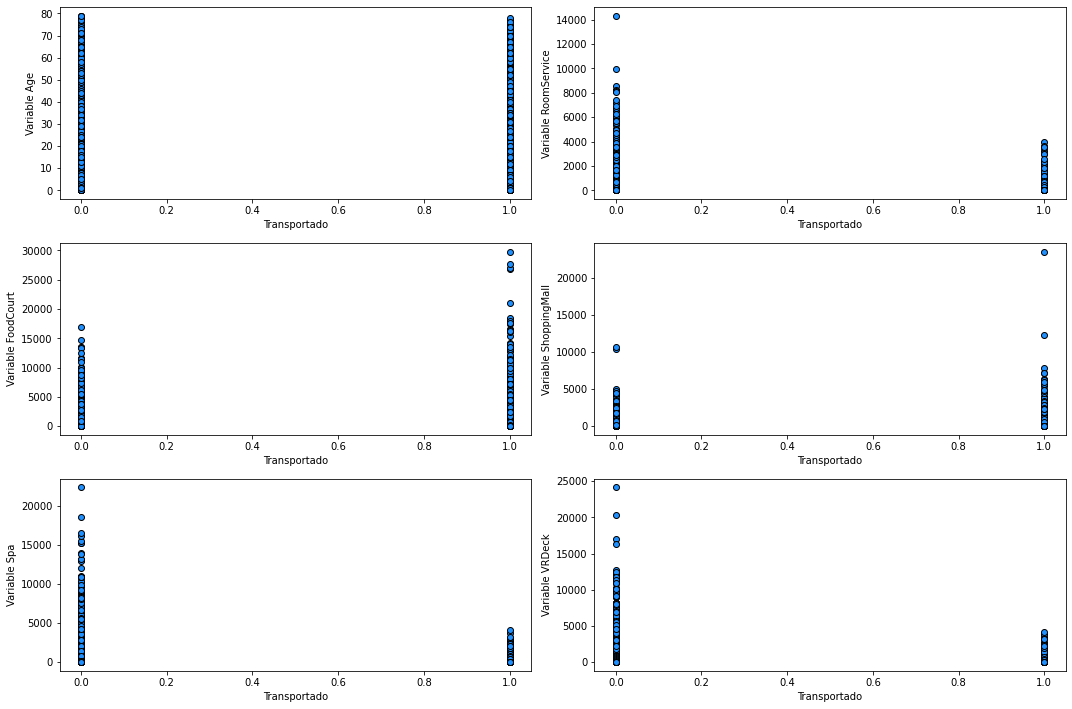

In [ ]:
feature = np.array(['Age','RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck'])

fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.ravel()
for i in range(len(feature)):
    axs[i].scatter(df['Transported'], df[feature[i]], facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[i].set_ylabel(f'Variable {feature[i]}')
    axs[i].set_xlabel('Transportado')
fig.tight_layout()
plt.show()

#### Age

Transported  False  True   All
Age                           
0.0             31   129   160
1.0             16    44    60
2.0             20    46    66
3.0             15    52    67
4.0             15    51    66
...            ...   ...   ...
76.0             1     1     2
77.0             1     1     2
78.0             2     1     3
79.0             3     0     3
All           3779  3882  7661

[81 rows x 3 columns]


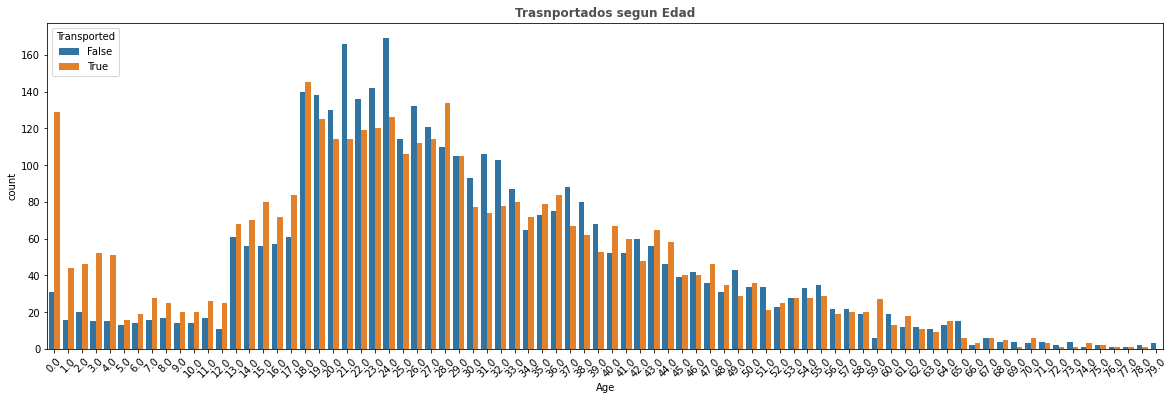

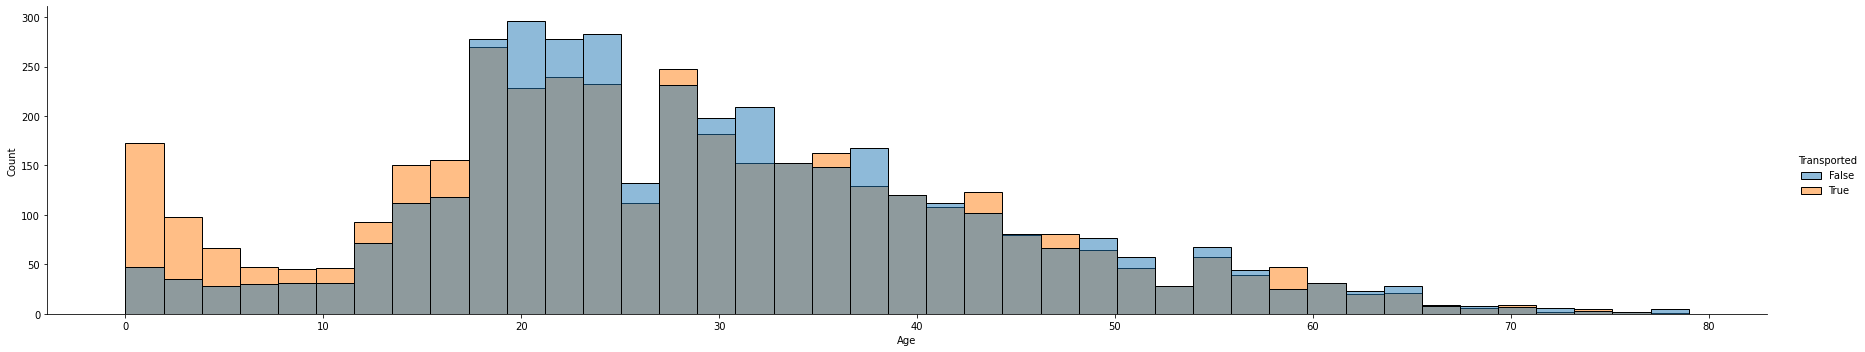

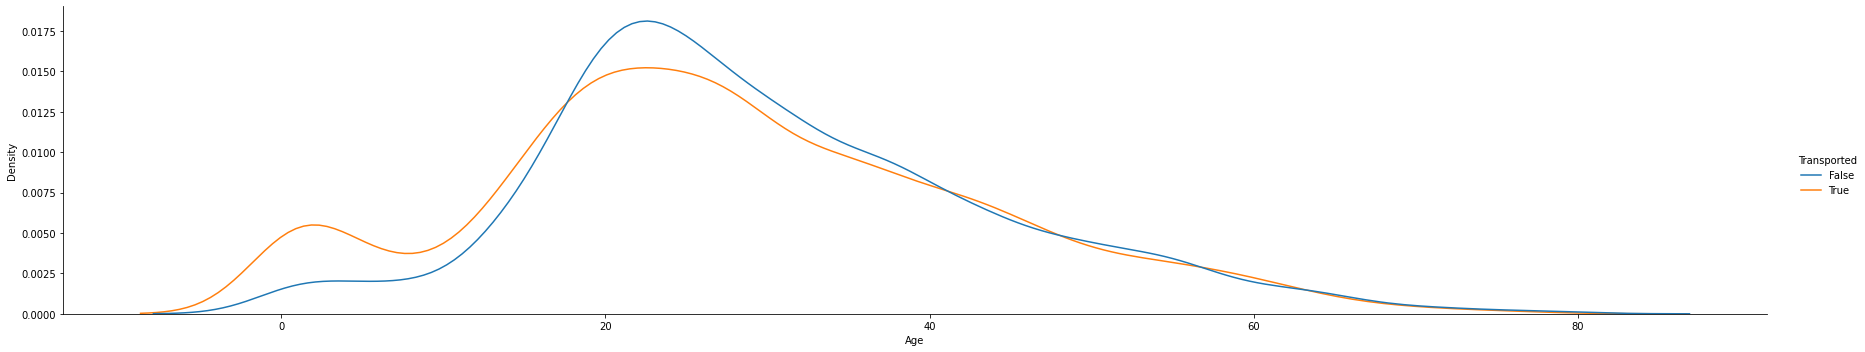

In [ ]:
df_Age = pd.crosstab(index = df['Age'], columns=df['Transported'], margins=True)
print(df_Age)

fig = plt.figure(figsize=(20,6))

plt.title('Trasnportados segun Edad', size=12, fontweight='bold', color='#505050')
plt.xticks(rotation=45)
sns.countplot(df.Age, hue=df.Transported)


sns.displot(df, x=df['Age'], hue=df['Transported'], kind="hist", aspect=5, rug=False ) #kde=True me realiza la grafica con la curva

sns.displot(df, x=df['Age'], hue=df['Transported'], kind="kde", aspect=5, rug=False ) 


#### Comodidades

In [ ]:
# Agrupo todas las comoldidades en una sola variable por persona
df['Comod'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

Transported  False  True   All
Comod                         
0.0            630  2317  2947
336.0            1     0     1
394.0            2     0     2
395.0            0     1     1
399.0            0     1     1
...            ...   ...   ...
30478.0          1     0     1
31074.0          0     1     1
31076.0          0     1     1
35987.0          1     0     1
All           3477  3553  7030

[1975 rows x 3 columns]


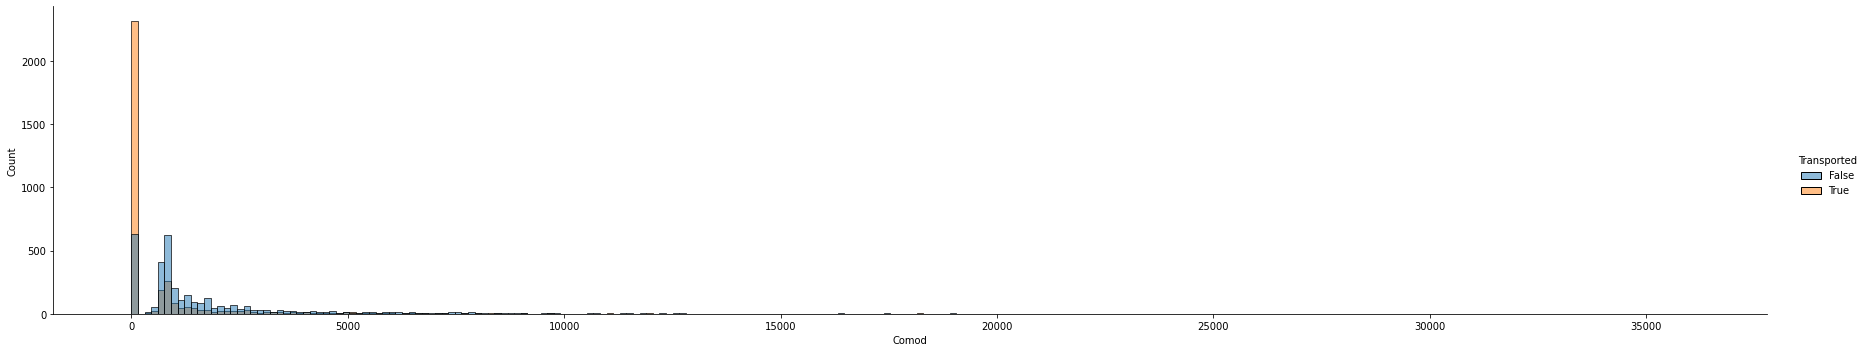

In [ ]:
df_Comod = pd.crosstab(index = df['Comod'], columns=df['Transported'], margins=True)
print(df_Comod)

sns.displot(df, x=df['Comod'], hue=df['Transported'], kind="hist", aspect=5, rug=False )

In [ ]:
# Solo para una mejor visibilizacion de la variable, vamos a reducir la grafica cortando los outliers y los valores 0
# que distorcionan el analisis. Por lo tanto aplicamos percentiles para determinar los limites que vamos a tomar

# Utilizamos el % de percentil alto para determinar los extremos superiores que queremos eliminar
percentil_alto=98
percentile_superior= df['Comod'].quantile(percentil_alto/100)
print('Valor de referencia obtenido {} para el % de percentil seleccionado {}'.format(percentile_superior, percentil_alto))

# Utilizamos el % de percentil bajo para determinar los extremos inferiores que queremos eliminar
percentil_bajo=25
percentile_inferior= df['Comod'].quantile(percentil_bajo/100)
print('Valor de referencia obtenido {} para el % de percentil seleccionado {}'.format(percentile_inferior, percentil_bajo))
print()

#Analizo cuantos valores me quedan por encima y por debajo de los % de percentiles seleccionados
debajo= len(df[df['Comod'] > percentile_superior])
print('Cantidad de registros {} por encima del valor obtenido {}, que estarian excluidos del % seleccionado'
  .format(debajo, percentile_superior))
print()
encima= len(df[df['Comod'] <= percentile_inferior])
print('Cantidad de registros {} por iguales o dabajo del valor obtenido {}, que estarian excluidos del % seleccionado'
  .format(encima, percentile_inferior))

# Fijo la variable limite_max a partir del cuartile considerado como apropiado para usar este limite en los futuros graficos
limite_max = percentile_superior
limite_min = percentile_inferior
print()
print()
print('Por lo tanto tomamos el monto {} como limite superior y el monto {} como limite inferior para filtrar datos en los futuros graficos'
  .format(percentile_superior, percentile_inferior))

Valor de referencia obtenido 10471.22000000001 para el % de percentil seleccionado 98
Valor de referencia obtenido 0.0 para el % de percentil seleccionado 25

Cantidad de registros 141 por encima del valor obtenido 10471.22000000001, que estarian excluidos del % seleccionado

Cantidad de registros 2947 por iguales o dabajo del valor obtenido 0.0, que estarian excluidos del % seleccionado


Por lo tanto tomamos el monto 10471.22000000001 como limite superior y el monto 0.0 como limite inferior para filtrar datos en los futuros graficos


In [ ]:
# Por seguridad creo un df_prueba donde copio el df antes de aplicarle los limites supeior e inferior calculado, 
# aplico los limites al df y que voy a utilizar como base para seguir trabajando el tema de los lenguajes
df_prueba = df.copy()
df_prueba = df_prueba[df_prueba.Comod > limite_min]
df_prueba = df_prueba[df_prueba.Comod <= limite_max]

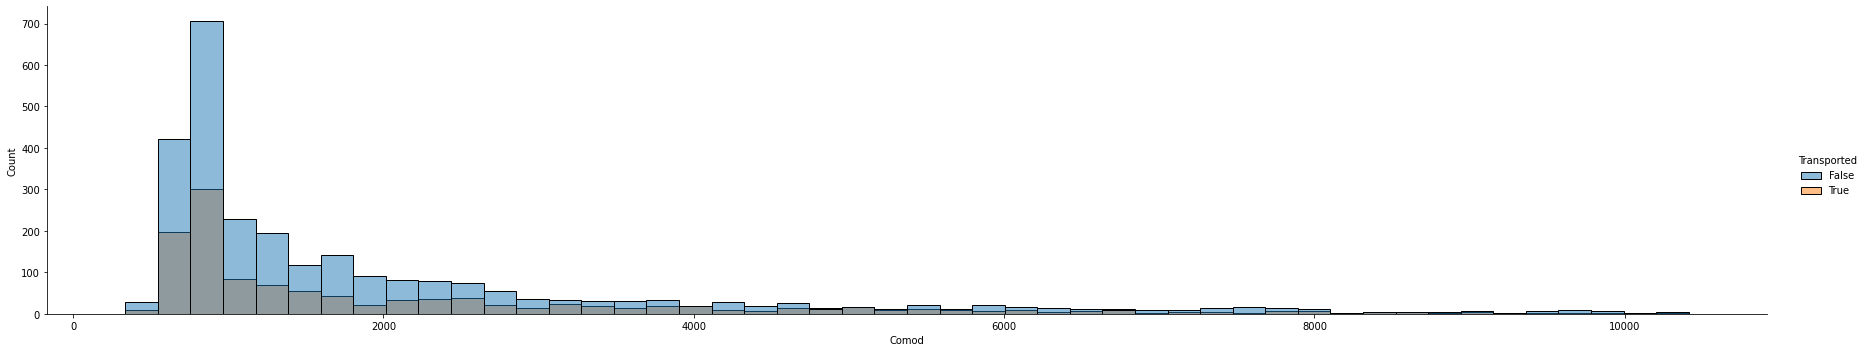

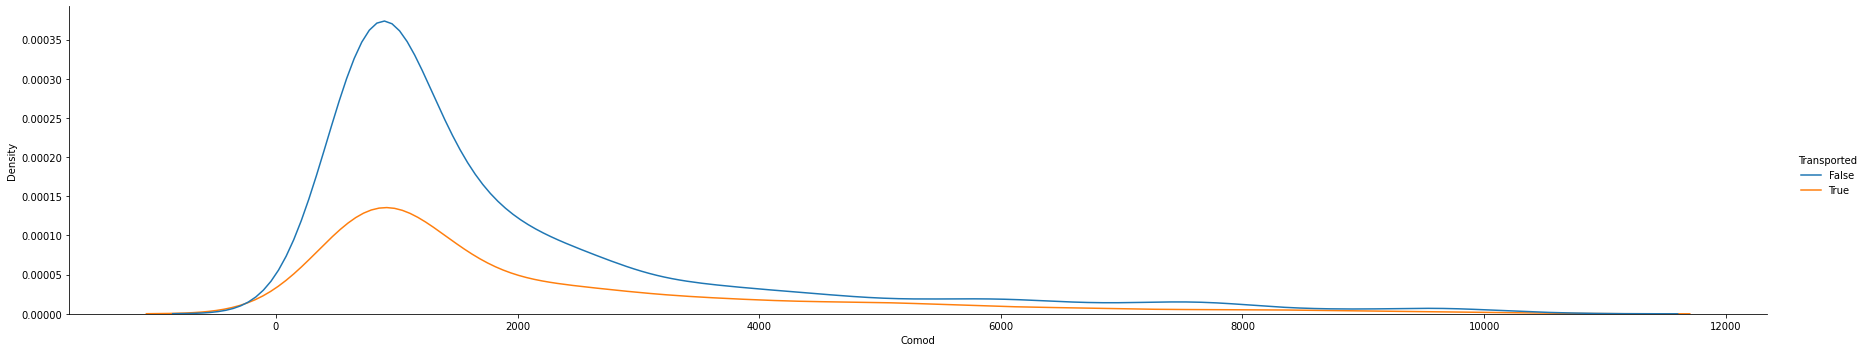

In [ ]:
sns.displot(df, x=df_prueba['Comod'], hue=df_prueba['Transported'], kind="hist", aspect=5, rug=False )
sns.displot(df, x=df_prueba['Comod'], hue=df['Transported'], kind="kde", aspect=5, rug=False ) 

##3--> Preparacion del DATA SET

###  Tranformamos Varaibles
1.   Preparo el dataframe pasando todas las variables categoricas a nuemericas porque todas las imputaciones y modelos utilizan variables numericas. 
  *   Podemos usar la funcion ***LabelEncoder()*** que coloca en la misma columna, un valor numerico a cada opcion que conforma una variable categorica. 

  *   Podemos usar la funcion ***OneHotEncoder()*** que agrega en el data frama una columna extre por cada  opcion que se encuentra en la variable categorica.

* Imputamos con distintas estrategias según la varibale, Fillna, mean, bins de las edades y median.

### Imputamos valores faltantes


In [ ]:
# Replace categorical variables with specific values (False, None) or freeest values.
df['CryoSleep'].fillna(False, inplace=True)
df['Cabin'].fillna('None', inplace=True)
df['VIP'].fillna(df.VIP.mode()[0], inplace=True)
df['HomePlanet'].fillna(df.HomePlanet.mode()[0], inplace=True)
df['Destination'].fillna(df.Destination.mode()[0], inplace=True)

# Replace continuous variables with specific values (0) or averages.
df['Age'].fillna(df.Age.mean(), inplace=True)
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] =\
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [ ]:
# As mentioned earlier, create a new variable by decomposing strings in Cabin and PassengerId.
df['Deck'] = df.Cabin.apply(lambda x:str(x)[:1])
df['Side'] = df.Cabin.apply(lambda x:str(x)[-1:])
# df['PassengerGroup'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
# df['PassengerNo'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

# Generate new variables based on the amount of money used for various services.
df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df['PctRoomService'] = df['RoomService']/df['TotalSpend']
df['PctFoodCourt'] = df['FoodCourt']/df['TotalSpend']
df['PctShoppingMall'] = df['ShoppingMall']/df['TotalSpend']
df['PctSpa'] = df['Spa']/df['TotalSpend']
df['PctVRDeck'] = df['VRDeck']/df['TotalSpend']

# Create new variables by dividing age groups.
df['AgeBin'] = 7
for i in range(6):
    df.loc[(df.Age >= 10*i) & (df.Age < 10*(i + 1)), 'AgeBin'] = i

In [ ]:
# Replaces the missing value that occurred when generating the derived variable.
fill_cols = ['PctRoomService', 'PctFoodCourt', 'PctShoppingMall', 'PctSpa', 'PctVRDeck']
df[fill_cols] = df[fill_cols].fillna(0)

In [ ]:
for col in df.columns[df.dtypes == object]:
    if col != 'Transported':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        
df['CryoSleep'] = df['CryoSleep'].astype('int')
df['VIP'] = df['VIP'].astype('int')

In [ ]:
from numpy.ma.extras import median
STRATEGY = 'median'

In [ ]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])
df["HomePlanet"].fillna('Z', inplace=True)

### Encoding de variables categóricas


In [ ]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(df,columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

df = label_encoder(df,label_cols)

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,Side,TotalSpend,PctRoomService,PctFoodCourt,PctShoppingMall,PctSpa,PctVRDeck,AgeBin
0,3086,1,0,5558,2,57.0,0,0.0,3859.0,13.0,...,False,2,0,7941.0,0.000000,0.485959,0.001637,0.024556,0.487848,5
1,597,2,1,1544,2,18.0,0,0.0,0.0,0.0,...,True,5,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,7589,1,1,4146,2,33.0,0,0.0,0.0,0.0,...,True,1,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,5821,0,0,1762,2,43.0,0,142.0,1208.0,0.0,...,False,5,0,1554.0,0.091377,0.777349,0.000000,0.000000,0.131274,4
4,82,0,0,5406,2,19.0,0,0.0,0.0,670.0,...,False,6,0,705.0,0.000000,0.000000,0.950355,0.001418,0.048227,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,5878,2,0,1620,2,12.0,0,0.0,0.0,0.0,...,True,5,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
7819,2417,0,0,4737,2,44.0,0,0.0,0.0,744.0,...,False,6,1,809.0,0.000000,0.000000,0.919654,0.076638,0.003708,4
7820,7270,2,1,2263,2,55.0,0,0.0,0.0,0.0,...,True,5,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5
7821,3442,0,0,590,2,15.0,0,0.0,840.0,123.0,...,False,4,0,983.0,0.000000,0.854527,0.125127,0.000000,0.020346,1


### Separamos datos de resultados

Saco la columna ***Transported*** y la colocamos en el ***df_result*** porque seria la base de resultado que utilizamos como resultado para nuestro analisis y dejamos en ***df*** los datos con los cuales vamos a trabajar


Armo el df_train

In [ ]:
#df, X_test = df.iloc[:df.shape[0]], df.iloc[df.shape[0]:].drop(['Transported'], axis=1)
#X_train, y_train = df.drop(['Transported'], axis=1), df['Transported']

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,Side,TotalSpend,PctRoomService,PctFoodCourt,PctShoppingMall,PctSpa,PctVRDeck,AgeBin
0,3086,1,0,5558,2,57.0,0,0.0,3859.0,13.0,...,False,2,0,7941.0,0.000000,0.485959,0.001637,0.024556,0.487848,5
1,597,2,1,1544,2,18.0,0,0.0,0.0,0.0,...,True,5,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,7589,1,1,4146,2,33.0,0,0.0,0.0,0.0,...,True,1,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,5821,0,0,1762,2,43.0,0,142.0,1208.0,0.0,...,False,5,0,1554.0,0.091377,0.777349,0.000000,0.000000,0.131274,4
4,82,0,0,5406,2,19.0,0,0.0,0.0,670.0,...,False,6,0,705.0,0.000000,0.000000,0.950355,0.001418,0.048227,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,5878,2,0,1620,2,12.0,0,0.0,0.0,0.0,...,True,5,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
7819,2417,0,0,4737,2,44.0,0,0.0,0.0,744.0,...,False,6,1,809.0,0.000000,0.000000,0.919654,0.076638,0.003708,4
7820,7270,2,1,2263,2,55.0,0,0.0,0.0,0.0,...,True,5,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5
7821,3442,0,0,590,2,15.0,0,0.0,840.0,123.0,...,False,4,0,983.0,0.000000,0.854527,0.125127,0.000000,0.020346,1


In [ ]:
# df.drop(["PassengerId"] , axis = 1 , inplace = True)
# df_test.drop(["PassengerId"] , axis = 1 , inplace = True)
TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]
RANDOM_STATE = 12 

In [ ]:
# df.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
# df_test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = df.drop(TARGET, axis =1 )
y = df[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

## 4--> Entrenamiento y prueba de algoritmos


In [ ]:
# Define dictionary with model accuracies
model_dict = {}

In [ ]:
classifier_LR = LogisticRegression(random_state=42)
predictor = classifier_LR.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred)
model_dict['logistic_regression'] = accuracy_log_reg
print(accuracy_log_reg)

0.778853601859024


In [ ]:
classifer_GNB = GaussianNB()
predictor = classifer_GNB.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

0.7618125484120837


In [ ]:
classifier_SVC = SVC(random_state=42)
predictor_svc = classifier_SVC.fit(X_train, y_train)
y_pred = predictor_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
model_dict['SVC'] = accuracy_svc
print(accuracy_svc)

0.7804027885360186


In [ ]:
classifier_KNC = KNeighborsClassifier()
predictor = classifier_KNC.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
model_dict['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

0.7575522850503486


In [ ]:
classifier_SGDC = SGDClassifier(random_state=42)
predictor = classifier_SGDC.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_sgdc = accuracy_score(y_test, y_pred)
model_dict['sgd_classifier'] = accuracy_sgdc
print(accuracy_sgdc)

0.6336173508907823


In [ ]:
classifier_RFC = RandomForestClassifier(random_state=42)
predictor = classifier_RFC.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.8059643687064292


In [ ]:
classifier_GBC = GradientBoostingClassifier(random_state=42)
predictor_gbc = classifier_GBC.fit(X_train, y_train)
y_pred = predictor_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred)
model_dict['gradient_boosting_classifier'] = accuracy_gbc
print(accuracy_gbc)

0.8024786986831913


In [ ]:
classifier_XGB = XGBClassifier(random_state=42)
predictor_xgb = classifier_XGB.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

0.8001549186676995


In [ ]:
classifier_LGBM = LGBMClassifier(random_state=42)
predictor_lgbm = classifier_LGBM.fit(X_train, y_train)
y_pred = predictor_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred)
model_dict['lgbm_classifier'] = accuracy_lgbm
print(accuracy_lgbm)

0.8121611154144074


In [ ]:
classifier_DTC = DecisionTreeRegressor(random_state=42)
predictor_dtr = classifier_DTC.fit(X_train, y_train)
y_pred = predictor_dtr.predict(X_test)
accuracy_dtr = accuracy_score(y_test, y_pred)
model_dict['dtr_classifier'] = accuracy_dtr
print(accuracy_dtr)

0.7478698683191325


## Visualizamos accuracy

In [ ]:
def visualize_model_accuracies(model_dict):
    model_accuracies_df = pd.DataFrame(columns=['Model', 'Accuracy'])
    model_accuracies_df['Model'] = model_dict.keys()
    model_accuracies_df['Accuracy'] = model_dict.values()
    model_accuracies_df.sort_values('Accuracy', inplace=True, ascending=False)

    plt.figure(figsize=(28,8),)
    plt.ylabel("Models", fontsize=16)
    plt.xlabel("Accuracy", fontsize=16)
    plt.title("Model Accuracies", fontsize=22)
    sns.barplot(y = pd.to_numeric(model_accuracies_df['Accuracy']), x = model_accuracies_df['Model'], palette='mako')
    plt.margins(x=0.005)
    plt.show()

    print("The 3 models with the highest accuracies are:")
    print(f"{model_accuracies_df.iloc[:3, ]}")

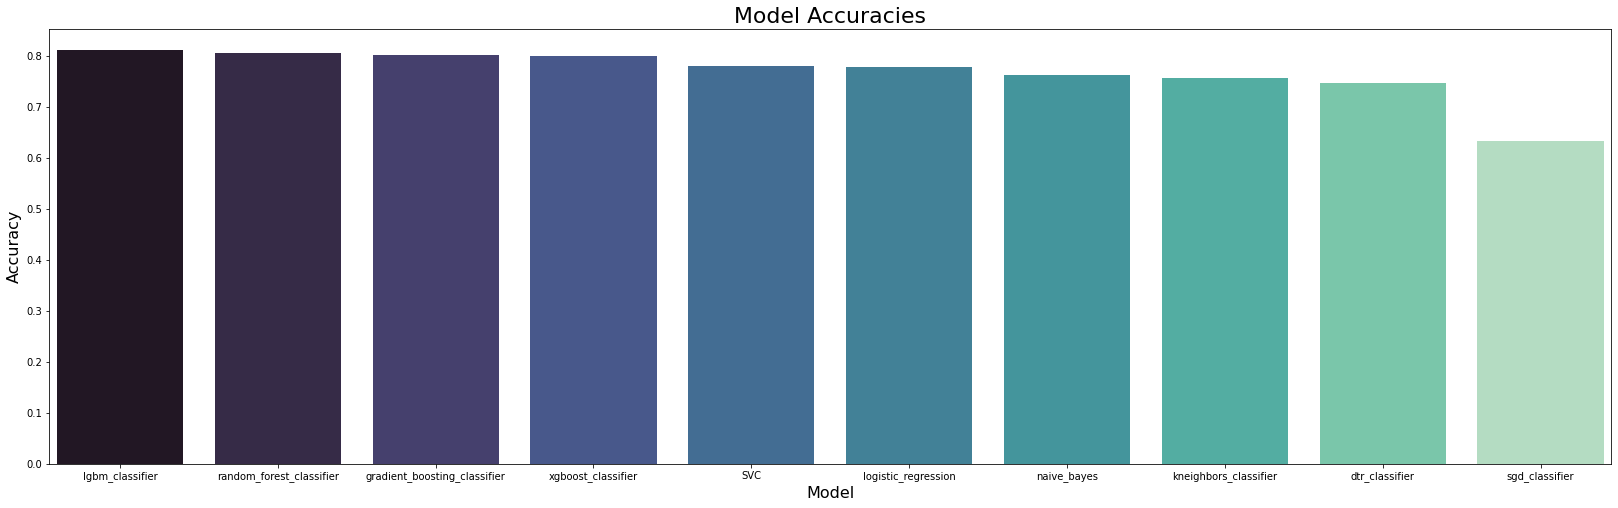

The 3 models with the highest accuracies are:
                          Model  Accuracy
8               lgbm_classifier  0.812161
5      random_forest_classifier  0.805964
6  gradient_boosting_classifier  0.802479


In [ ]:
visualize_model_accuracies(model_dict)

## Optimización de hiperparámetros con Optuna

In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 27.9 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 51.6 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 112 kB 42.6 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 147 kB 40.5 MB/s 


In [ ]:
import optuna

In [ ]:
import sklearn.ensemble
import sklearn.model_selection

def objective():
        
    clf = sklearn.ensemble.RandomForestClassifier(    
        n_estimators=5, max_depth=3)  # Define the model.
    
    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=3).mean()  # Train and evaluate the model.

print('Accuracy: {}'.format(objective()))

Accuracy: 0.7607079080782194


Probamos RandomForest con 50 trials

In [ ]:

def objective(trial):
    
    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-07-28 14:55:36,414] A new study created in memory with name: no-name-7e411604-b6f1-43e5-8822-ba79964a3d3a
[I 2022-07-28 14:55:50,045] Trial 0 finished with value: 0.5067109806616291 and parameters: {'classifier': 'SVC', 'svc_c': 5535625.031822912}. Best is trial 0 with value: 0.5067109806616291.
[I 2022-07-28 14:56:04,419] Trial 1 finished with value: 0.5067109806616291 and parameters: {'classifier': 'SVC', 'svc_c': 2.005238276505345e-10}. Best is trial 0 with value: 0.5067109806616291.
[I 2022-07-28 14:56:04,925] Trial 2 finished with value: 0.7576401292571595 and parameters: {'classifier': 'RandomForest', 'n_estimators': 20, 'max_depth': 3.7885776418269894}. Best is trial 2 with value: 0.7576401292571595.
[I 2022-07-28 14:56:05,478] Trial 3 finished with value: 0.7833319311778969 and parameters: {'classifier': 'RandomForest', 'n_estimators': 9, 'max_depth': 15.398150311187326}. Best is trial 3 with value: 0.7833319311778969.
[I 2022-07-28 14:56:06,170] Trial 4 finished with v

Accuracy: 0.798544631293913
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 17, 'max_depth': 10.16038577640064}


### Ploteamos los resultados de la optimizacion

Plotting the optimization history of the study.

In [ ]:
optuna.visualization.plot_optimization_history(study)

Plotting the accuracies for each hyperparameter for each trial.

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth'])

Visualizamos la importancia de los hiperparametros

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
pip install verstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 26.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.7 MB/s 
     |████████████████████████████████| 2.0 MB 60.0 MB/s 
     |████████████████████████████████| 308 kB 59.1 MB/s 
     |████████████████████████████████| 23.9 MB 1.7 MB/s 
     |████████████████████████████████| 227 kB 63.1 MB/s 
     |████████████████████████████████| 155 kB 31.4 MB/s 
     |████████████████████████████████| 665.5 MB 18 kB/s 
     |████████████████████████████████| 1.3 MB 37.7 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 463 kB 59.3 MB/s 
  Created wheel for verstack: filename=verstack-3.2.3-py3-none-any.whl size=82449 sha256=268ee304c9d24c1d23057af2bee4ad33d51cedd37282fef8493e5904799ef5e0
  Stored in directory: /root/.cache/pip/wheels/6e/41/5e/32418b66781da74c36516c3820a5fe442b5447e50a89a78760
Succ

### LGBMTuner
Utilizamos LGBMTuner para optimizar hiperparámetros de LGBM que fue el modelo que mejor accuracy nos dio. Mostramos el resultado de la optimización y la feature importance.


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 10 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

[1]	valid_0's binary_logloss: 0.688446
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.68385
[3]	valid_0's binary_logloss: 0.679592
[4]	valid_0's binary_logloss: 0.675153
[5]	valid_0's binary_logloss: 0.670584
[6]	valid_0's binary_logloss: 0.666593
[7]	valid_0's binary_logloss: 0.662351
[8]	valid_0's binary_logloss: 0.658242
[9]	valid_0's binary_logloss: 0.654102
[10]	valid_0's binary_logloss: 0.650314
[11]	valid_0's binary_logloss: 0.646518
[12]	valid_0's binary_logloss: 0.642718
[13]	valid_0's binary_logloss: 0.638831
[14]	valid_0's binary_logloss: 0.635153
[15]	valid_0's binary_logloss: 0.631547
[16]	valid_0's binary_logloss: 0.627908
[17]	valid_0's binary_logloss: 0.624455
[18]	valid_0's binary_logloss: 0.62125
[19]	valid_0's binary_logloss: 0.617857
[20]	valid_0's binary_logloss: 0.614

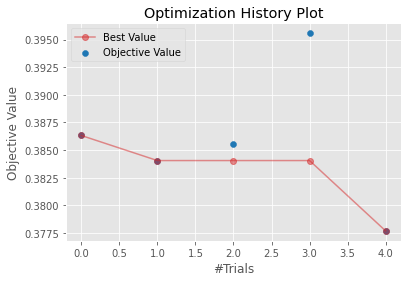

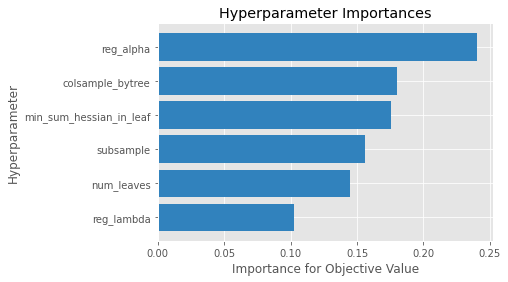

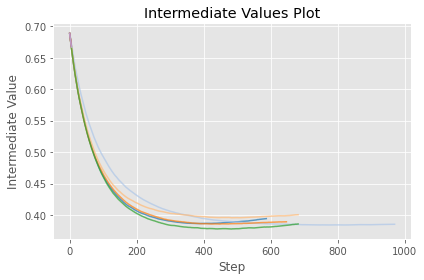

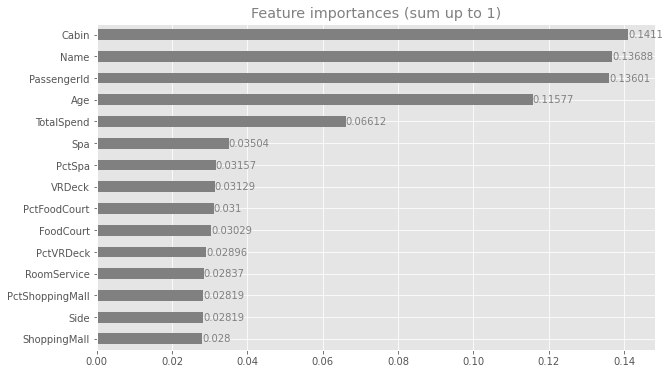


     . Optuna hyperparameters optimization finished
     .. Best trial number: 4    |     log_loss:          0.37768191462111694
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  355   |     accuracy:           0.8113496932515337

Time elapsed for fit execution: 56.20435 seconds


ValueError: ignored

In [ ]:
from verstack import LGBMTuner
# import the data

# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'accuracy', trials = 10) # <- the only required argument
tuner.fit(X, y)
# check the optimization log in the console.
pred = tuner.predict(df_test)

In [ ]:
best_params = study.best_params

## -->5 Reentrenamos con los mejores hiperparámetros

Utilizamos la salida de la optimización de hiperparámetros de LGBMTuner y Optuna en RandomForestClasiffier para reentrenar con los nuevos valores

In [ ]:
RFC_best = RandomForestClassifier(random_state=42, n_estimators=20, max_depth=9.840967480842902)
predictor = RFC_best.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
model_dict['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.7993803253292022


In [ ]:
LGBM_best = LGBMClassifier(learning_rate=0.01, num_leaves=66, colsample_bytree=0.9162213204002109, subsample=0.5909124836035503,
                            bagging_freq=1, max_depth=-1, verbosity=-1, reg_lambda=0.00052821153945323,
                            zero_as_missing=False, max_bin=255, min_data_in_bin=3, random_state=42, 
                            num_classes=1,min_sum_hessian_in_leaf=0.00541524411940254, n_estimators=422)
predictor_lgbm = LGBM_best.fit(X_train, y_train)
y_pred = predictor_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred)
model_dict['lgbm_classifier'] = accuracy_lgbm
print(accuracy_lgbm)

0.8109992254066615


## -->6 Generar la salida para entregar

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0453_02,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,9244_01,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4807_01,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8811_01,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,3184_01,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,6346_02,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5843_01,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,7134_01,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1515_01,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


### Imputamos valores faltantes en Test


In [ ]:
# Replace categorical variables with specific values (False, None) or freeest values.
df_test['CryoSleep'].fillna(False, inplace=True)
df_test['Cabin'].fillna('None', inplace=True)
df_test['VIP'].fillna(df_test.VIP.mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df_test.HomePlanet.mode()[0], inplace=True)
df_test['Destination'].fillna(df_test.Destination.mode()[0], inplace=True)

# Replace continuous variables with specific values (0) or averages.
df_test['Age'].fillna(df_test.Age.mean(), inplace=True)
df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] =\
df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [ ]:
# As mentioned earlier, create a new variable by decomposing strings in Cabin and PassengerId.
df_test['Deck'] = df_test.Cabin.apply(lambda x:str(x)[:1])
df_test['Side'] = df_test.Cabin.apply(lambda x:str(x)[-1:])
# df['PassengerGroup'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
# df['PassengerNo'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

# Generate new variables based on the amount of money used for various services.
df_test['TotalSpend'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test['PctRoomService'] = df_test['RoomService']/df_test['TotalSpend']
df_test['PctFoodCourt'] = df_test['FoodCourt']/df_test['TotalSpend']
df_test['PctShoppingMall'] = df_test['ShoppingMall']/df_test['TotalSpend']
df_test['PctSpa'] = df_test['Spa']/df_test['TotalSpend']
df_test['PctVRDeck'] = df_test['VRDeck']/df_test['TotalSpend']

# Create new variables by dividing age groups.
df_test['AgeBin'] = 7
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeBin'] = i

In [ ]:
# Replaces the missing value that occurred when generating the derived variable.
fill_cols = ['PctRoomService', 'PctFoodCourt', 'PctShoppingMall', 'PctSpa', 'PctVRDeck']
df_test[fill_cols] = df_test[fill_cols].fillna(0)

In [ ]:
for col in df_test.columns[df_test.dtypes == object]:
    if col != 'Transported':
        le = LabelEncoder()
        df_test[col] = le.fit_transform(df_test[col])
        
df_test['CryoSleep'] = df_test['CryoSleep'].astype('int')
df_test['VIP'] = df_test['VIP'].astype('int')

In [ ]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(df_test[imputer_cols])
df_test[imputer_cols] = imputer.transform(df_test[imputer_cols])
df_test["HomePlanet"].fillna('Z', inplace=True)

### Encoding de variables categóricas en Test


In [ ]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(df_test,columns):
    for col in columns:
        df_test[col] = df_test[col].astype(str)
        df_test[col] = LabelEncoder().fit_transform(df_test[col])
    return df_test

df_test = label_encoder(df_test,label_cols)

### Generamos la salida

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Deck,Side,TotalSpend,PctRoomService,PctFoodCourt,PctShoppingMall,PctSpa,PctVRDeck,AgeBin
0,40,1,1,803,0,34.0,0,0.0,0.0,0.0,...,578,7,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3
1,868,0,1,641,1,13.0,0,0.0,0.0,0.0,...,182,6,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,448,0,0,754,2,44.0,0,22.0,1.0,0.0,...,279,6,0,887.0,0.024803,0.001127,0.000000,0.974070,0.000000,4
3,826,0,0,182,1,63.0,0,0.0,0.0,80.0,...,473,4,1,2402.0,0.000000,0.000000,0.033306,0.000000,0.966694,7
4,300,1,0,168,0,10.0,0,0.0,0.0,0.0,...,74,1,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,592,2,0,250,2,54.0,0,676.0,0.0,231.0,...,48,5,1,1286.0,0.525661,0.000000,0.179627,0.294712,0.000000,5
866,536,0,1,789,2,58.0,0,0.0,0.0,0.0,...,410,6,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5
867,669,0,1,558,1,18.0,0,0.0,0.0,0.0,...,389,6,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
868,155,0,0,394,2,18.0,0,765.0,0.0,13.0,...,401,5,1,778.0,0.983290,0.000000,0.016710,0.000000,0.000000,1


In [ ]:
df_test.PassengerId.value_counts()

40     1
662    1
213    1
284    1
714    1
      ..
314    1
370    1
288    1
727    1
507    1
Name: PassengerId, Length: 870, dtype: int64

In [ ]:
PassengerId = df_test['PassengerId']

In [ ]:
#NO CORRER 








# df_test[imputer_cols] = imputer.fit_transform(df_test[imputer_cols])


# df_test.drop(['Name'], inplace=True, axis=1)

#for col in label_cols:
#    df_test[col] = df_test[col].astype(str)
#    df_test[col] = LabelEncoder().fit_transform(df_test[col])

#cols = df_test.columns
# df_test = StandardScaler().fit_transform(df_test)
#df_test = pd.DataFrame(df_test, columns=cols)

In [ ]:
df_test.Name.value_counts()

854    16
467     1
781     1
448     1
433     1
       ..
710     1
518     1
478     1
488     1
624     1
Name: Name, Length: 855, dtype: int64

In [ ]:
y_pred_RFC = RFC_best.predict(df_test)
y_pred_RFC

array([ True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,

In [ ]:
submit_RFC = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': y_pred
})
submit_RFC.head()

,PassengerId,Survived
0,40,True
1,868,True
2,448,False
3,826,False
4,300,True


In [ ]:
submit_RFC.to_csv('Predicciones_RFC.csv', index = False)

In [ ]:
y_pred_LGBM2 = classifier_LGBM.predict(df_test)
y_pred_LGBM2

array([ True,  True, False, False,  True, False, False, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,

In [ ]:
submit_LGBM2 = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': y_pred_LGBM2
})
submit_LGBM2.head()

,PassengerId,Survived
0,40,True
1,868,True
2,448,False
3,826,False
4,300,True


In [ ]:
submit_LGBM2.to_csv('Predicciones_LGBM_v4.csv', index = False)

In [ ]:
y_pred_LGBM = LGBM_best.predict(df_test)
y_pred_LGBM

array([ True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,

In [ ]:
submit_LGBM = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': y_pred
})
submit_LGBM.head()

,PassengerId,Survived
0,40,True
1,868,True
2,448,False
3,826,False
4,300,True


In [ ]:
submit_LGBM.to_csv('Predicciones_LGBM.csv', index = False)

In [ ]:
y_pred_XGB = classifier_XGB.predict(df_test)
y_pred_XGB

array([ True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,

In [ ]:
y_pred_GBC = classifier_GBC.predict(df_test)
y_pred_GBC

array([ True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,

In [ ]:
submit_XGB = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': y_pred
})
submit_XGB.head()

ValueError: ignored

In [ ]:
submit_LGBM.to_csv('Predicciones_LGBM.csv', index = False)

In [ ]:
submission = pd.DataFrame(list(zip(PassengerId, y_pred_LGBM)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

In [ ]:
files.download("Predicciones_LGBM_v4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>